<div style="background-color: #3498db; padding-top: 10px; border: 2px solid #2980b9; color: white; text-align: center;">

# MODS205 - Digital Finance

**Professor:** Patrick Waelbroeck

**Students**

DE SENE ALVIZI Yuri

MARTINS BRAGA Arthur

</div>

#### Question 1

Comment on the article “Crypto’s Richest Rebel” from Fortune April/May 2022 available on the e-campus website using all keywords and concepts covered in the course.


#### Question 2

Comment on the article “Binance CEO Changpeng Zhao charged with money laundering” from Fortune Website 2023-11-23 available on the e-campus website using all keywords and concepts covered in the course


#### Question 3


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

**3.1. Import data in Excel (2 stocks, CAC40 index, 5-week interest rate from the US Treasury). Sort data by date and make sure that all dates coincides for all columns. Adjust cells if there are missing values.**

In [ ]:
bnpa_df = pd.read_csv('BN.PA.csv')
cappa_df = pd.read_csv('CAP.PA.csv')
fchi_df = pd.read_csv('^FCHI.csv')
irx_df = pd.read_csv('^IRX.csv')

bnpa_df['Date'] = pd.to_datetime(bnpa_df['Date'])
cappa_df['Date'] = pd.to_datetime(cappa_df['Date'])
fchi_df['Date'] = pd.to_datetime(fchi_df['Date'])
irx_df['Date'] = pd.to_datetime(irx_df['Date'])

all_dates = pd.concat([bnpa_df['Date'], cappa_df['Date'],
                      fchi_df['Date'], irx_df['Date']])
unique_dates = all_dates.unique()

unique_dates = sorted(unique_dates)

bnpa_df = bnpa_df.set_index('Date')
cappa_df = cappa_df.set_index('Date')
fchi_df = fchi_df.set_index('Date')
irx_df = irx_df.set_index('Date')

bnpa_df = bnpa_df.reindex(unique_dates)
cappa_df = cappa_df.reindex(unique_dates)
fchi_df = fchi_df.reindex(unique_dates)
irx_df = irx_df.reindex(unique_dates)

nan_lines = pd.concat([bnpa_df, cappa_df, fchi_df, irx_df])
nan_lines = nan_lines[nan_lines.isna().any(axis=1)]

bnpa_df = bnpa_df.drop(nan_lines.index)
cappa_df = cappa_df.drop(nan_lines.index)
fchi_df = fchi_df.drop(nan_lines.index)
irx_df = irx_df.drop(nan_lines.index)

**3.2. Give a short financial analysis of the two stocks by using relevant concepts of the course.**

In [1]:
import mplfinance as mpf

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

mpf.plot(bnpa_df, type='candle', ax=axes[0], style='binance')
mpf.plot(cappa_df, type='candle', ax=axes[1], style='binance')

plt.tight_layout()
plt.show()


NameError: name 'plt' is not defined

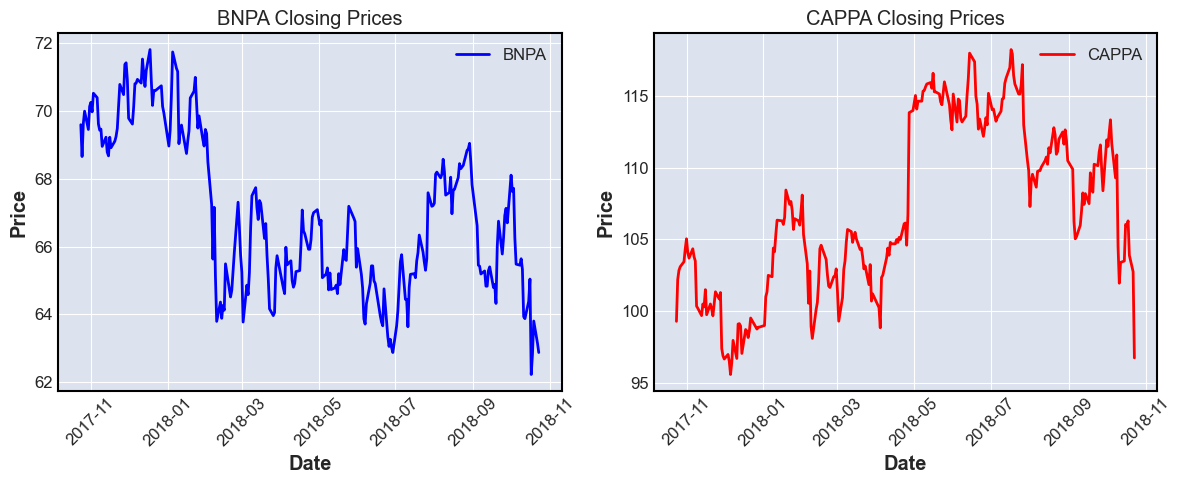

In [65]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].plot(bnpa_df.index, bnpa_df['Close'], label='BNPA', color='blue')
axes[0].set_title('BNPA Closing Prices')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Price')
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend()

axes[1].plot(cappa_df.index, cappa_df['Close'], label='CAPPA', color='red')
axes[1].set_title('CAPPA Closing Prices')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Price')
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend()

plt.tight_layout()
plt.show()


**3.3. Compute the return for both stocks and for the CAC40 index. Comment on your results.**

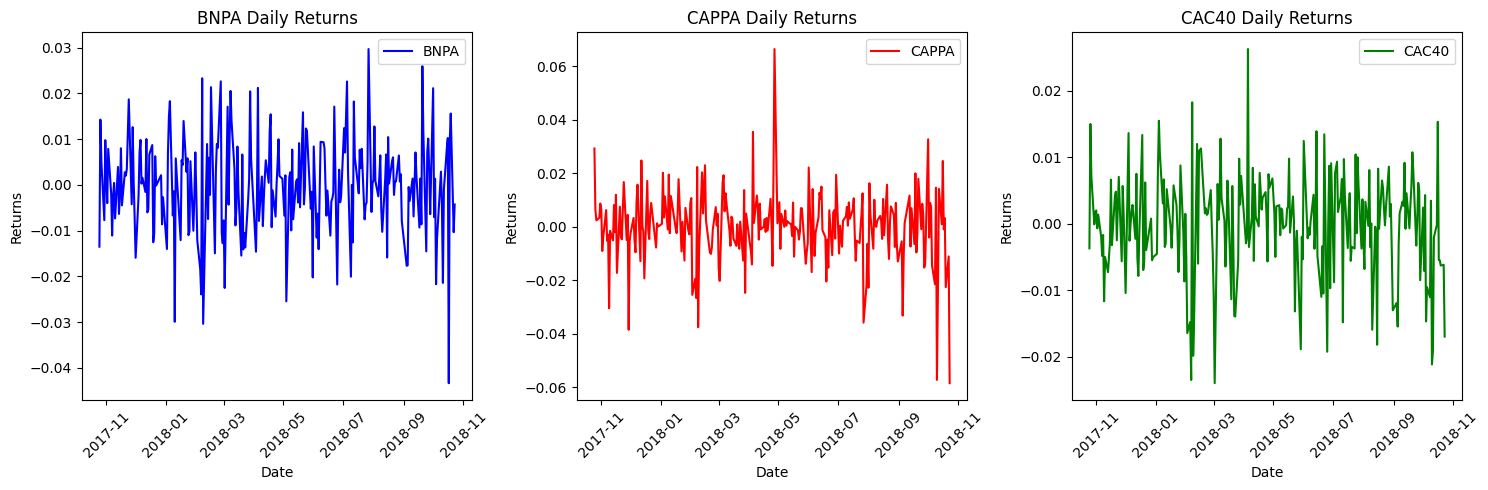

In [45]:
# Compute daily returns
bnpa_daily_returns = bnpa_df['Close'].pct_change().dropna()
cappa_daily_returns = cappa_df['Close'].pct_change().dropna()
cac40_daily_returns = fchi_df['Close'].pct_change().dropna()

# Plot the returns
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].plot(bnpa_daily_returns.index, bnpa_daily_returns,
       label='BNPA', color='blue')
axes[0].set_title('BNPA Daily Returns')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Returns')
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend()

axes[1].plot(cappa_daily_returns.index, cappa_daily_returns,
       label='CAPPA', color='red')
axes[1].set_title('CAPPA Daily Returns')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Returns')
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend()

axes[2].plot(cac40_daily_returns.index, cac40_daily_returns,
       label='CAC40', color='green')
axes[2].set_title('CAC40 Daily Returns')
axes[2].set_xlabel('Date')
axes[2].set_ylabel('Returns')
axes[2].tick_params(axis='x', rotation=45)
axes[2].legend()

plt.tight_layout()
plt.show()

**3.4. Compute the coefficients of Kurtosis and of asymmetry of the 3 series of question 3.3. Plot the histograms and comment on your results**

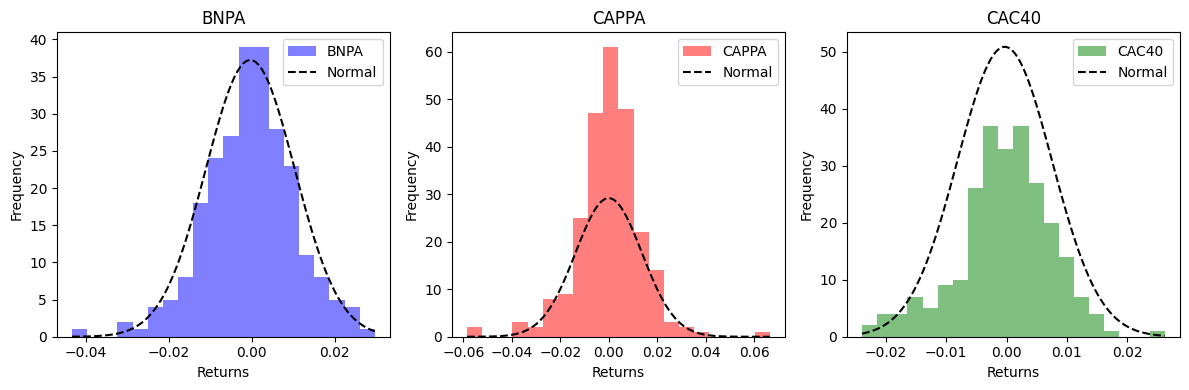

,Stock,Skewness,Kurtosis
0,BNPA,-0.261981,0.910156
1,CAPPA,-0.323975,4.147156
2,CAC40,-0.345872,0.661933


In [39]:
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy.stats import norm

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Plot histogram for BNPA
axes[0].hist(bnpa_daily_returns, bins=20, alpha=0.5, label='BNPA', color='blue')
axes[0].set_title('BNPA')
axes[0].set_xlabel('Returns')
axes[0].set_ylabel('Frequency')

# Add normal distribution line
x = np.linspace(bnpa_daily_returns.min(), bnpa_daily_returns.max(), 100)
y = norm.pdf(x, bnpa_daily_returns.mean(), bnpa_daily_returns.std())
axes[0].plot(x, y, color='black', linestyle='--', label='Normal')
axes[0].legend()

# Plot histogram for CAPPA
axes[1].hist(cappa_daily_returns, bins=20, alpha=0.5, label='CAPPA', color='red')
axes[1].set_title('CAPPA')
axes[1].set_xlabel('Returns')
axes[1].set_ylabel('Frequency')

# Add normal distribution line
x = np.linspace(cappa_daily_returns.min(), cappa_daily_returns.max(), 100)
y = norm.pdf(x, cappa_daily_returns.mean(), cappa_daily_returns.std())
axes[1].plot(x, y, color='black', linestyle='--', label='Normal')
axes[1].legend()

# Plot histogram for CAC40
axes[2].hist(cac40_daily_returns, bins=20, alpha=0.5, label='CAC40', color='green')
axes[2].set_title('CAC40')
axes[2].set_xlabel('Returns')
axes[2].set_ylabel('Frequency')

# Add normal distribution line
x = np.linspace(cac40_daily_returns.min(), cac40_daily_returns.max(), 100)
y = norm.pdf(x, cac40_daily_returns.mean(), cac40_daily_returns.std())
axes[2].plot(x, y, color='black', linestyle='--', label='Normal')
axes[2].legend()

plt.tight_layout()
plt.show()


# Compute the skewness of the daily returns
bnpa_skewness = skew(bnpa_daily_returns)
cappa_skewness = skew(cappa_daily_returns)
cac40_skewness = skew(cac40_daily_returns)

# Compute the kurtosis of the daily returns
bnpa_kurtosis = kurtosis(bnpa_daily_returns)
cappa_kurtosis = kurtosis(cappa_daily_returns)
cac40_kurtosis = kurtosis(cac40_daily_returns)

data = {'Stock': ['BNPA', 'CAPPA', 'CAC40'],
        'Skewness': [bnpa_skewness, cappa_skewness, cac40_skewness],
        'Kurtosis': [bnpa_kurtosis, cappa_kurtosis, cac40_kurtosis]}

df_skew_kurt = pd.DataFrame(data)
df_skew_kurt

Result analysis:

1. **Skewness**:
   - A negative skewness indicates that the distribution of daily returns is skewed to the left, meaning there's a longer tail on the negative side of the distribution. 
   - All three stocks have negative skewness values, with CAPPA exhibiting the most negative skewness (-0.323975), followed by CAC40 (-0.345872), and BNPA (-0.261981). This suggests that these stocks tend to have more frequent but moderate negative returns compared to positive returns.

2. **Kurtosis**:
   - CAPPA stands out with a relatively higher kurtosis value (4.147156), indicating heavier tails in its distribution compared to the normal distribution. This suggests that CAPPA's daily returns have more extreme values, either positive or negative, compared to BNPA and CAC40.
   - Both BNPA (0.910156) and CAC40 (0.661933) have kurtosis values close to 1, which suggests that their distributions are closer to the normal distribution in terms of tail behavior compared to CAPPA. It's also notable that BNPA is the closest to the normal distribution.

In summary, CAPPA exhibits the most extreme behavior with heavier tails in its distribution (high kurtosis) and a strong skewness towards the negative side. BNPA and CAC40 have less extreme distributions with negative skewness indicating more frequent but moderate negative returns, and their kurtosis values suggest slightly heavier tails compared to a normal distribution.

**3.5. Compute the standard errors of the return for both stocks for the full period and then for 3 sub-periods of equal size. Is volatility constant?**


In [15]:
# Compute the standard errors of the return for the full period
bnpa_std_full_error = bnpa_daily_returns.std()
cappa_std_full_error = cappa_daily_returns.std()
cac40_std_full_error = cac40_daily_returns.std()


# Divide the daily returns into three periods
bnpa_returns_periods = np.array_split(bnpa_daily_returns, 3)
cappa_returns_periods = np.array_split(cappa_daily_returns, 3)
cac40_returns_periods = np.array_split(cac40_daily_returns, 3)

# Calculate the standard deviation of each period
bnpa_std_periods = [period.std() for period in bnpa_returns_periods]
cappa_std_periods = [period.std() for period in cappa_returns_periods]
cac40_std_periods = [period.std() for period in cac40_returns_periods]

data = {'Stock': ['BNPA', 'CAPPA', 'CAC40'],
        'Full Period': [bnpa_std_full_error, cappa_std_full_error, cac40_std_full_error],
        'Period 1': [bnpa_std_periods[0], cappa_std_periods[0], cac40_std_periods[0]],
        'Period 2': [bnpa_std_periods[1], cappa_std_periods[1], cac40_std_periods[1]],
        'Period 3': [bnpa_std_periods[2], cappa_std_periods[2], cac40_std_periods[2]]}

standardErrorsDf = pd.DataFrame(data)
standardErrorsDf

,Stock,Full Period,Period 1,Period 2,Period 3
0,BNPA,0.010716,0.010905,0.010172,0.011173
1,CAPPA,0.013675,0.013031,0.012642,0.015205
2,CAC40,0.007846,0.007824,0.007835,0.007950


Testing if the volatility is constant at different periods using Using Brown-Forsythe Test:

- $H_0$: The volatility, represented by the standard error of returns, is constant over all periods.

- $H_1$: The volatility is not constant.


In [23]:
def brownForsytheTest(returns_periods):
    _, p_value = stats.levene(*returns_periods, center='median')
    return p_value


testResults = [brownForsytheTest(bnpa_returns_periods), brownForsytheTest(
    cappa_returns_periods), brownForsytheTest(cac40_returns_periods)]

alpha = 0.05
data = {'Stock': ['BNPA', 'CAPPA', 'CAC40'],
        'Brown-Forsythe Test': testResults,
        'Reject Null Hypothesis': [p_value < alpha for p_value in testResults]}

testDf = pd.DataFrame(data)
testDf

,Stock,Brown-Forsythe Test,Reject Null Hypothesis
0,BNPA,0.844949,False
1,CAPPA,0.349744,False
2,CAC40,0.715637,False


For all three periods, the p-value of all stocks is more than 0.05, which means we fail to reject the null hypothesis. This suggests that the volatility is constant over all periods for all stocks.

**3.6. Compute the correlation between each stock and the CAC40. Comment on your results.**

Using Pearson correlation coefficient and p-value for testing non-correlation.

- $H_0:$ There is not a relationship between $\text{stock}_i$ and CAC40

- $H_1:$ There is a relationship between $\text{stock}_i$ and CAC40

In [28]:
# Compute the correlation between each stock and the CAC40
correlation_bnpa = stats.pearsonr(fchi_df['Close'], bnpa_df['Close'])
correlation_cappa = stats.pearsonr(fchi_df['Close'], cappa_df['Close'])

alpha = 0.05

data = {'Stock': ['BNPA', 'CAPPA'],
        'Correlation with CAC40': [correlation_bnpa[0], correlation_cappa[0]],
        'P-value': [correlation_bnpa[1], correlation_cappa[1]],
        'Reject Null Hypothesis': [correlation_bnpa[1] < alpha, correlation_cappa[1] < alpha]}

correlationDf = pd.DataFrame(data)
correlationDf

,Stock,Correlation with CAC40,P-value,Reject Null Hypothesis
0,BNPA,0.402717,3.986898e-11,True
1,CAPPA,0.506235,1.304248e-17,True


Both stocks BNPA and CAPPA have relevant correlation with CAC40, with p-values less than 0.05. This suggests that there is a relationship between the stocks and CAC40. The correlation coefficient for BNPA is 0.40, which is a strong positive correlation, and for CAPPA is 0.51, which is also a strong positive correlation. This means that the stocks move in the same direction as CAC40, and the strength of the relationship is strong. 

3.7. Compute the returns of a portfolio in which both stocks have an equal weight. Compute
the average return and the standard deviation over the whole sample period. Comment on
your results.


3.8. Consider a portfolio with one stock and the risk-free interest rate (you can choose the
stock out of the two that are available). What is the optimal portfolio allocation between these
two assets for an investor with a utility function presented in the course and A=1.5?


3.9. Consider the following 3 portfolios: portfolio 1 has stock 1 as the only component;
portfolio 2 has stock 2 as the only component; portfolio 3 is the portfolio of question 3.7.
These are the only portfolio available to investors. Draw the efficient frontier. Which portfolio
are inefficient?


3.10. Consider the portfolio of question 3.7. Compute the Sharpe ratio, the Sortino ratio, the
Sterling ratio. Why are there differences between these ratios?


3.12. Compute the empirical VAR at 1% for the same portfolio. Compute the 1st percentile of the normal distribution with mean and variance corresponding respectively to the empirical mean and to the empirical variance. Comment on your results.


3.12. Compute the VAR using resampling with 1000 observations. Compute the 1% VAR on the simulated data set. Comment on your results.


#### Question 4

Run an automated trading algorithm using any method you want (moving averages, candlesticks, patterns, ML, …) over the sample period. You can only have 3 positions: buy/sell, short/cover, do nothing. You cannot use derivative products. Can you beat the market?
